# **Setup Model, Data Loader, Optimizer and Loss**

In [10]:
from models import networks as n
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as opt

from util import losses as loss
from util import loaders as load
from util import training as train
from util import helpers as helper
from models import networks as n


############################################################################
# Network
############################################################################

res_net = n.CustomResnet(51)
res_net.cuda()

############################################################################
# Loss
############################################################################

mse_crit = loss.LogCoshLoss()
point_crit = loss.PointLoss().cuda()

############################################################################
# Optimizer
############################################################################

lr = 1e-3
lr_array = np.array([lr/100,lr/10,lr])
lr_groups = res_net.lr_groups()

opt_params = [{"params":lr_groups[0].parameters(),"lr":lr_array[0]},
              {"params":lr_groups[1].parameters(),"lr":lr_array[1]},
              {"params":lr_groups[2].parameters(),"lr":lr_array[2]}]

adam_opt = opt.Adam(opt_params,betas=(0.9, 0.999),
                    weight_decay= .0001)

############################################################################
# Data Generators
############################################################################

transform = load.NormDenorm([.5, .5, .5],
                            [.5, .5, .5])

train_data= load.LandMarkGenerator( transform,
                                   output_res=128,
                                   size = 10000,
                                   rand_rot = .7)

test_data = load.LandMarkGenerator( transform,
                                   output_res=128,
                                   size = 300,
                                   rand_rot = .7)  
 
batch_size = 8

mtrain = torch.utils.data.DataLoader(train_data,
                                     batch_size=batch_size,
                                     num_workers=8,
                                     shuffle=True,
                                     drop_last=True)

mtest  = torch.utils.data.DataLoader(test_data,
                                     batch_size=batch_size,
                                     num_workers=8,
                                     shuffle=False,
                                     drop_last=True)

############################################################################
# Train Dictionary
############################################################################

train_dict = {
    "train_loader":mtrain,
    "test_loader":mtest,
    "opt":adam_opt,
    "net":res_net,
    "mse_crit":mse_crit,
    "point_crit":point_crit
}

output_name = "test_"

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


# **View Data Sample**

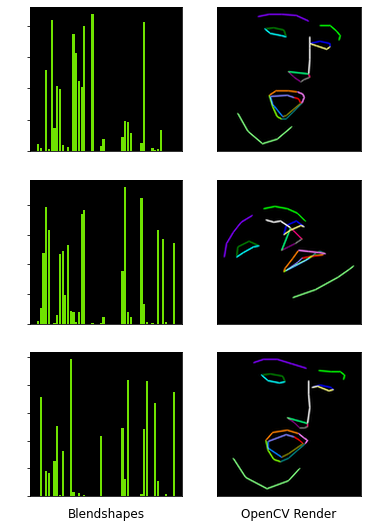

In [11]:
% matplotlib inline
helper.view_dataset(train_data,transform)

# **Train Round One**

Run #1


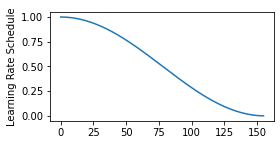

Layer 0 : Grad:False
Layer 1 : Grad:False
Layer 2 : Grad:False
Layer 3 : Grad:False
Layer 4 : Grad:False
Layer 5 : Grad:False
train mse_loss: 0.06547567993402481   train point_loss: 0.006029407028108835
test mse_loss: 0.047344453632831573   test point_loss: 0.005132046528160572
Done
Run #2


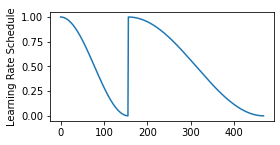

Layer 0 : Grad:False
Layer 1 : Grad:False
Layer 2 : Grad:False
Layer 3 : Grad:False
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.04990987852215767   train point_loss: 0.00503277312964201
test mse_loss: 0.04187541455030441   test point_loss: 0.004163805395364761
Done
Run #3


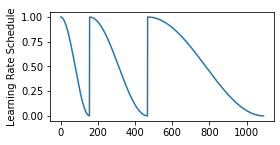

Layer 0 : Grad:False
Layer 1 : Grad:False
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.043340977281332016   train point_loss: 0.004208867903798819
test mse_loss: 0.03490070253610611   test point_loss: 0.0033110298682004213
Done
Run #4


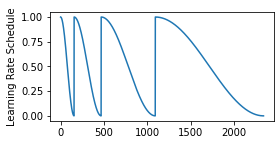

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.03911702707409859   train point_loss: 0.0039050583727657795
test mse_loss: 0.03964918851852417   test point_loss: 0.004298054613173008
train mse_loss: 0.034832779318094254   train point_loss: 0.0035240205470472574
test mse_loss: 0.030084053054451942   test point_loss: 0.002870472613722086
Done
Run #5


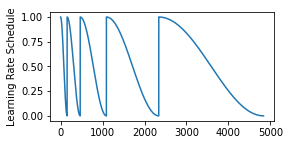

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.03554191440343857   train point_loss: 0.0036568574141710997
test mse_loss: 0.03652269393205643   test point_loss: 0.0038417621981352568
train mse_loss: 0.03284311667084694   train point_loss: 0.003389526391401887
test mse_loss: 0.0359756201505661   test point_loss: 0.003986774478107691
train mse_loss: 0.03382205218076706   train point_loss: 0.0034974906593561172
test mse_loss: 0.031139522790908813   test point_loss: 0.003048586193472147
train mse_loss: 0.027258392423391342   train point_loss: 0.0028368711937218904
test mse_loss: 0.02390514500439167   test point_loss: 0.0024869146291166544
Done
Run #6


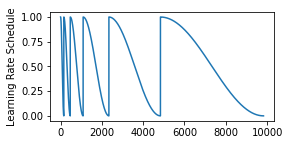

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.03103691153228283   train point_loss: 0.003262631129473448
test mse_loss: 0.03237590566277504   test point_loss: 0.003562878118827939
train mse_loss: 0.029240136966109276   train point_loss: 0.003080547321587801
test mse_loss: 0.03239337354898453   test point_loss: 0.003374649677425623
train mse_loss: 0.02979052998125553   train point_loss: 0.003143947571516037
test mse_loss: 0.026303216814994812   test point_loss: 0.00284379324875772
train mse_loss: 0.025691717863082886   train point_loss: 0.002727774903178215
test mse_loss: 0.03273209556937218   test point_loss: 0.003581821918487549
train mse_loss: 0.02971612475812435   train point_loss: 0.0031459727324545383
test mse_loss: 0.028966695070266724   test point_loss: 0.003072932129725814
train mse_loss: 0.027590753510594368   train point_loss: 0.0029348747339099646
test mse_loss: 0.025655463337898254  

In [12]:
lr = 1e-3  
lr_array = np.array([lr/5,lr/5,lr])

for i in range(1,7):
    print (f'Run #{i}')
    epoch_count = i
    lr_list = train.set_lr_sched(epoch_count,mtrain.__len__()//batch_size,2.0)
    helper.lr_preview(lr_list)
    freeze = (i-1)*2
    if i == 4:
        freeze = 100
    train.one_run(train_dict,freeze,lr_list,lr_array)

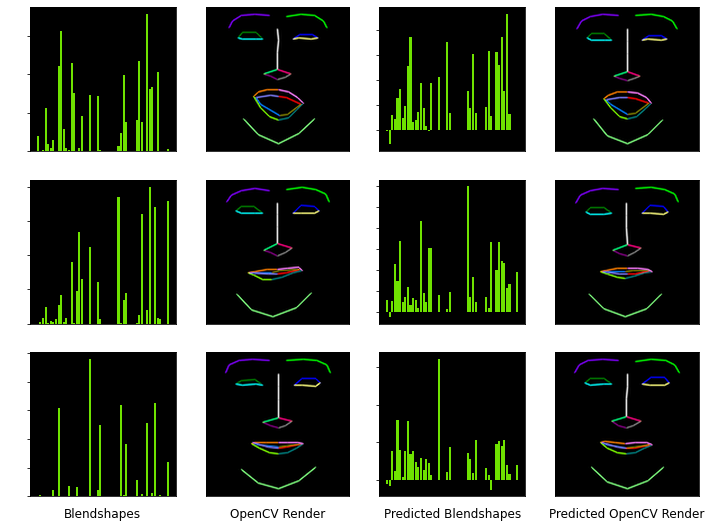

/content/facial-pose-estimation-pytorch-v2/models/networks.py:192: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  bs = int(tensor.shape[0])
/content/facial-pose-estimation-pytorch-v2/models/networks.py:193: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  res = int(tensor.shape[2])


In [13]:
helper.view_predictions(res_net,train_data)
helper.save_jit('output_run',1,res_net)

# **Train Round Two**

Run #1


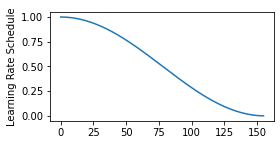

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.021979836747050285   train point_loss: 0.0023704790510237217
test mse_loss: 0.021342206746339798   test point_loss: 0.0022563792299479246
Done
Run #2


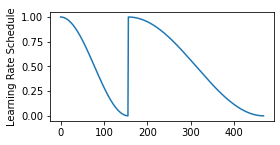

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.0219094380736351   train point_loss: 0.0023914489429444075
test mse_loss: 0.021388094872236252   test point_loss: 0.002343649510294199
Done
Run #3


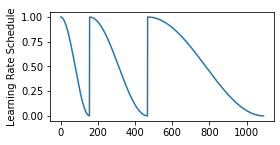

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.021723628044128418   train point_loss: 0.0023674163967370987
test mse_loss: 0.0205753892660141   test point_loss: 0.0021547407377511263
Done
Run #4


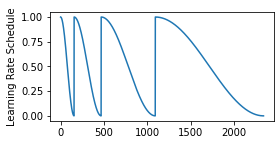

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.0213325098156929   train point_loss: 0.0023365491069853306
test mse_loss: 0.02159825526177883   test point_loss: 0.002303301589563489
train mse_loss: 0.020971614867448807   train point_loss: 0.0022924672812223434
test mse_loss: 0.02013135701417923   test point_loss: 0.0022602230310440063
Done
Run #5


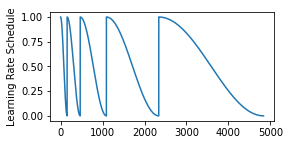

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.020739739760756493   train point_loss: 0.0022890453692525625
test mse_loss: 0.020575309172272682   test point_loss: 0.002156441332772374
train mse_loss: 0.020423365756869316   train point_loss: 0.0022648305166512728
test mse_loss: 0.020566755905747414   test point_loss: 0.002227013697847724
train mse_loss: 0.020353591069579124   train point_loss: 0.002267594914883375
test mse_loss: 0.01920786313712597   test point_loss: 0.002164392964914441
train mse_loss: 0.019575586542487144   train point_loss: 0.0021844536531716585
test mse_loss: 0.01929197460412979   test point_loss: 0.002225757809355855
Done
Run #6


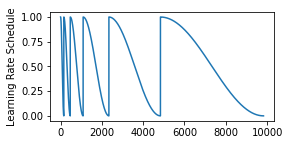

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.019663574174046516   train point_loss: 0.002216827357187867
test mse_loss: 0.019880926236510277   test point_loss: 0.002231752034276724
train mse_loss: 0.019537895917892456   train point_loss: 0.0022064170334488153
test mse_loss: 0.018868662416934967   test point_loss: 0.0022449172101914883
train mse_loss: 0.019603876397013664   train point_loss: 0.002216650638729334
test mse_loss: 0.01884736493229866   test point_loss: 0.0021438144613057375
train mse_loss: 0.018806112930178642   train point_loss: 0.0021354323253035545
test mse_loss: 0.01896917074918747   test point_loss: 0.0021327168215066195
train mse_loss: 0.019540628418326378   train point_loss: 0.0022280265111476183
test mse_loss: 0.019332073628902435   test point_loss: 0.0021555237472057343
train mse_loss: 0.01906483992934227   train point_loss: 0.0021828985773026943
test mse_loss: 0.0184870120

In [14]:
lr = 1e-4  
lr_array = np.array([lr/5,lr/3,lr])

for i in range(1,7):
    print (f'Run #{i}')
    epoch_count = i
    lr_list = train.set_lr_sched(epoch_count,mtrain.__len__()//batch_size,2.0)
    helper.lr_preview(lr_list)

    freeze = 100
    train.one_run(train_dict,freeze,lr_list,lr_array)

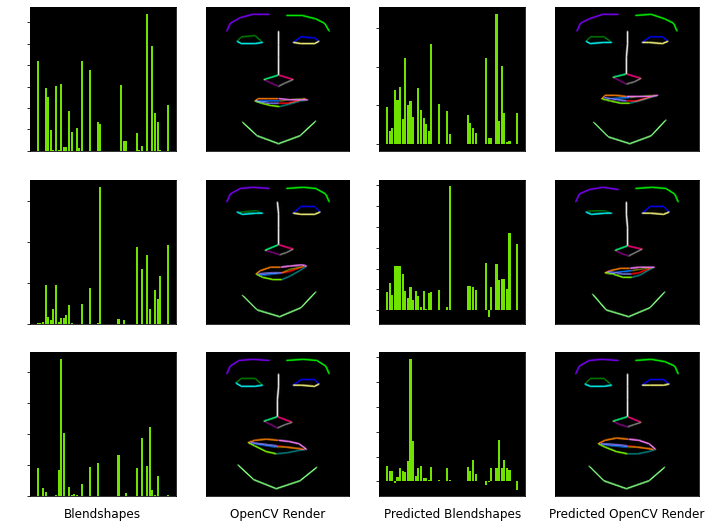

/content/facial-pose-estimation-pytorch-v2/models/networks.py:192: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  bs = int(tensor.shape[0])
/content/facial-pose-estimation-pytorch-v2/models/networks.py:193: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  res = int(tensor.shape[2])


In [15]:
helper.view_predictions(res_net,train_data)
helper.save_jit('output_run',2,res_net)

# **Train Round Three**

Run #1


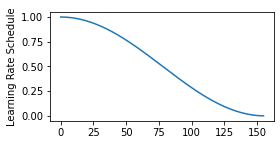

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.017412351444363594   train point_loss: 0.001996395643800497
test mse_loss: 0.017104584723711014   test point_loss: 0.0019417288713157177
Done
Run #2


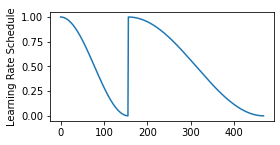

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.017946265637874603   train point_loss: 0.0020845679100602865
test mse_loss: 0.016920600086450577   test point_loss: 0.001978702610358596
Done
Run #3


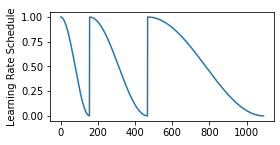

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.017932943999767303   train point_loss: 0.0020641006994992495
test mse_loss: 0.017633933573961258   test point_loss: 0.0019957891199737787
Done
Run #4


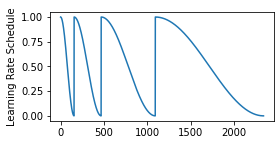

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.0177253820002079   train point_loss: 0.0020480246748775244
test mse_loss: 0.017835302278399467   test point_loss: 0.001971395220607519
train mse_loss: 0.0175520908087492   train point_loss: 0.002034424804151058
test mse_loss: 0.015898894518613815   test point_loss: 0.0018432537326589227
Done
Run #5


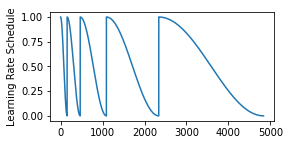

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.01765328086912632   train point_loss: 0.002047165296971798
test mse_loss: 0.016596684232354164   test point_loss: 0.001958610722795129
train mse_loss: 0.0175902359187603   train point_loss: 0.0020380904898047447
test mse_loss: 0.01752227358520031   test point_loss: 0.0019920016638934612
train mse_loss: 0.017561469227075577   train point_loss: 0.002041375730186701
test mse_loss: 0.017766201868653297   test point_loss: 0.002012301469221711
train mse_loss: 0.017452172935009003   train point_loss: 0.002023824490606785
test mse_loss: 0.01716477796435356   test point_loss: 0.001954051898792386
Done
Run #6


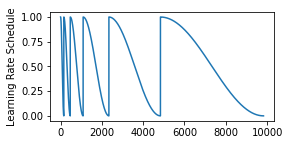

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.017311880365014076   train point_loss: 0.0020333849824965
test mse_loss: 0.017010068520903587   test point_loss: 0.0019826190546154976
train mse_loss: 0.0174869317561388   train point_loss: 0.0020324373617768288
test mse_loss: 0.01688048616051674   test point_loss: 0.001972869737073779
train mse_loss: 0.017372312024235725   train point_loss: 0.0020176072139292955
test mse_loss: 0.017123298719525337   test point_loss: 0.001968520460650325
train mse_loss: 0.01717994175851345   train point_loss: 0.002019851002842188
test mse_loss: 0.01625073328614235   test point_loss: 0.0019259508699178696
train mse_loss: 0.017293553799390793   train point_loss: 0.002020385814830661
test mse_loss: 0.01704183965921402   test point_loss: 0.00198341510258615
train mse_loss: 0.017050759866833687   train point_loss: 0.0019929897971451283
test mse_loss: 0.01632370613515377  

In [16]:
lr = 1e-5  
lr_array = np.array([lr/5,lr/3,lr])

for i in range(1,7):
    print (f'Run #{i}')
    epoch_count = i
    lr_list = train.set_lr_sched(epoch_count,mtrain.__len__()//batch_size,2.0)
    helper.lr_preview(lr_list)

    freeze = 100
    train.one_run(train_dict,freeze,lr_list,lr_array)

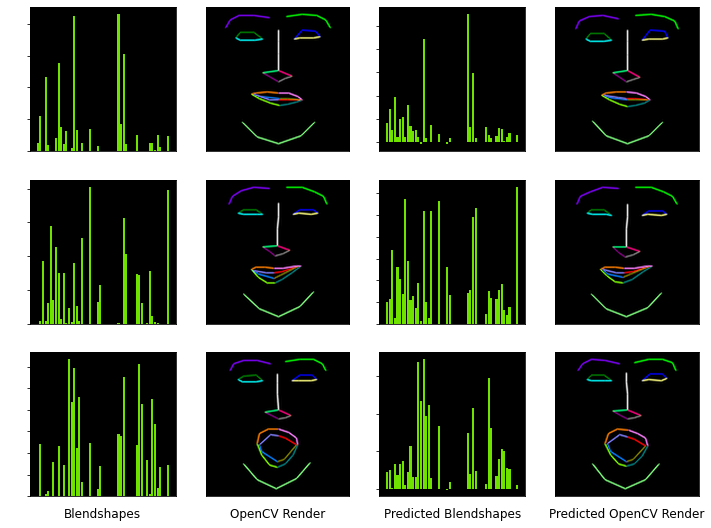

/content/facial-pose-estimation-pytorch-v2/models/networks.py:192: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  bs = int(tensor.shape[0])
/content/facial-pose-estimation-pytorch-v2/models/networks.py:193: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  res = int(tensor.shape[2])


In [17]:
helper.view_predictions(res_net,train_data)
helper.save_jit('output_run',3,res_net)